In [1]:
import pandas as pd
import numpy as np

In [2]:
ab=pd.read_csv("test_5xor_128dim.csv")

In [3]:
ab[ab.iloc[:,:]==-1]=-1
ab[ab.iloc[:,:]==1]=1
ab

,-1,1,1.1,1.2,1.3,1.4,-1.1,1.5,-1.2,1.6,...,-1.58,-1.59,1.61,-1.60,-1.61,1.62,-1.62,1.63,1.64,1.65
0,1,1,1,1,-1,1,1,-1,1,-1,...,1,1,-1,-1,1,-1,-1,1,1,-1
1,1,-1,-1,-1,1,1,1,-1,1,1,...,-1,-1,1,-1,-1,1,-1,-1,-1,1
2,1,1,-1,-1,-1,-1,1,-1,-1,1,...,-1,-1,-1,1,-1,1,1,-1,1,1
3,-1,-1,-1,1,1,-1,1,1,-1,1,...,-1,-1,-1,-1,1,1,-1,1,1,-1
4,1,1,-1,-1,1,1,1,-1,-1,1,...,-1,1,-1,-1,1,1,-1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,-1,-1,1,-1,-1,1,-1,-1,1,-1,...,-1,1,1,-1,1,1,1,1,-1,1
999995,-1,1,-1,1,-1,1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,1,1,1
999996,-1,1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,1,1,-1,1,-1
999997,-1,-1,-1,1,1,-1,-1,1,1,-1,...,-1,1,1,1,1,1,1,1,-1,1


In [17]:
k=1
for i in ab.iloc[3,:128]:
    k+=i
k

23

In [5]:
ndata, ncols = np.shape(ab)

In [6]:
np.random.seed(66505)                 # Make sure you use the last five digits of your student UCard as your seed
index = np.random.permutation(ndata)  # We permute the indexes 
N = np.int64(np.round(0.01*ndata))    # We compute N, the number of training instances
Nval = np.int64(np.round(0.98*ndata)) # We compute Nval, the number of validation instances   
Ntest = ndata - N - Nval              # We compute Ntest, the number of test instances
data_training_unproc = ab.iloc[index[0:N], :].copy() # Select the training data
data_val_unproc = ab.iloc[index[N:N+Nval], :].copy() # Select the validation data
data_test_unproc = ab.iloc[index[N+Nval:ndata], :].copy() # Select the test data

In [7]:
Xtrain = data_training_unproc.drop('1.65',axis=1)
yTrain = data_training_unproc['1.65']
XVal = data_val_unproc.drop('1.65',axis=1)
yVal = data_val_unproc['1.65']
XTest = data_test_unproc.drop('1.65',axis=1)
yTest = data_test_unproc['1.65']

yTrain[yTrain==-1]=0
yTest[yTest==-1]=0

def enc(y):
    y_new=[None]*y.shape[0]
    for i in range(y.shape[0]):
        if y.iloc[i]==-1: y_new[i]=np.array([1,0])
        if y.iloc[i]==1: y_new[i]=np.array([0,1])
    return np.array(y_new)

yTrain=enc(yTrain)
yTest=enc(yTest)

In [8]:
yTrain

315187   -1
426196   -1
708194   -1
379279   -1
956024    1
         ..
538326   -1
90223    -1
946143   -1
407742    1
465758    1
Name: 1.65, Length: 10000, dtype: int64

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
model = RandomForestClassifier()
features_in_train=Xtrain.shape[1]                

# Choosing 6 different values of estimators for Grid Search
n_estimators = np.linspace(start=50, stop=100, num=2).astype(int) 

# Number of features, anywhere from 1 feature to all the features
#max_features = np.linspace(start=1, stop=features_in_train, num=features_in_train).astype(int)  

# 5 choices for number of samples. The fractions are automatically multiplied by total samples to generate an integer
max_samples = np.linspace(start=0.1, stop=0.9, num=3)

# We create a parameter grid
param_grid = dict(n_estimators= n_estimators,max_samples= max_samples)#, max_features= max_features) 

# We now perform a grid search. 
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
grid = GridSearchCV(model, param_grid=param_grid, cv=cv, scoring='accuracy')
grid.fit(Xtrain,yTrain)   

# We need to set refit=False, because if we don't, the grid search will refit the model on the 
# full dataset (i.e. ignoring cv) after the grid search completes giving us very high accuracy

print("""The best values as per the grid search on combination of different parameters and cross validation 
over validation set is-""", grid.best_params_)

The best values as per the grid search on combination of different parameters and cross validation 
over validation set is- {'max_samples': 0.5, 'n_estimators': 100}


In [10]:
best = RandomForestClassifier(n_estimators = grid.best_params_["n_estimators"], max_samples = grid.best_params_["max_samples"])
best.fit(Xtrain,yTrain)
ypred=best.predict(XTest)
from sklearn.metrics import accuracy_score # Accuracy score
accuracy = accuracy_score(yTest, ypred)
print(accuracy) 

0.5085


In [11]:
ypred

array([-1,  1,  1, ..., -1, -1, -1], dtype=int64)

In [21]:
import matplotlib.pyplot as plt
RMSE_1= [0.777, 0.778, 0.777, 0.778, 0.778]
RMSE_2= [0.782, 0.783, 0.782, 0.782, 0.783]
RMSE_3= [0.917, 0.916, 0.921, 0.914, 0.918]
RMSE_4= [0.920, 0.920, 0.924, 0.919, 0.922]

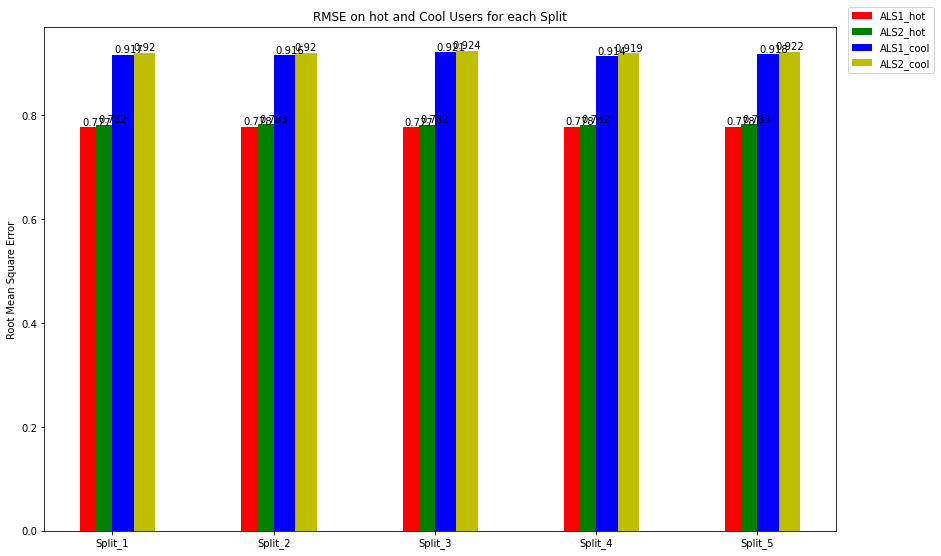

In [56]:
### plotting
ind = np.arange(5)
width=0.2
fig = plt.figure(figsize=(11,7))
ax = fig.add_axes([0,0,1,1])
ax.bar(ind + 0.0, RMSE_1, color = 'r', width=width, label='ALS1_hot')
ax.bar(ind + width/2, RMSE_2, color = 'g', width=width, label='ALS2_hot')
ax.bar(ind + width, RMSE_3, color = 'b', width=width, label='ALS1_cool')
ax.bar(ind + width*1.5, RMSE_4, color = 'y', width=width/1.5, label='ALS2_cool')

for bars in ax.containers:
    ax.bar_label(bars)
plt.ylabel('Root Mean Square Error')
plt.title('RMSE on hot and Cool Users for each Split')
plt.xticks(ind + width / 2, ('Split_1', 'Split_2', 'Split_3', 'Split_4'
                             , 'Split_5'))
plt.legend(bbox_to_anchor=(1.13, 1.05))
#plt.savefig("""/data/acp21jka/ScalableML/Output/Q2fig_A.png"""
 #           , bbox_inches='tight')
plt.show()